# Mobile Customer Churn

This Portfolio task involves some (fake but realistic) data on Mobile Customer Churn.  Churn is where a customer leaves the mobile provider. The goal is to build a simple predictive model to predict churn from available features. 

The data was simulated based on a real dataset provided by Optus, but the column headings are the same.  

The data is in the file `MobileCustomerChurn.csv` and column headings are defined in the file `MobileChurnDataDictionary.csv`

The goal here is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

The aim is to explore the data, build a model using a selection of features and then try to find out which features provide the most accurate results.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,...,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,...,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,...,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,...,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,...,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


In [3]:
churn = churn.drop(['CUST_ID', 'RECON_SMS_NEXT_MTH', 'RECON_TELE_NEXT_MTH', 'RECON_EMAIL_NEXT_MTH'],axis=1)
churn.head()

# dropping irrelevant columns

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW


In [4]:
churn['CHURN_IND'].unique()

# checking possible data values of the churn indicator which we need to predict

array([1, 0], dtype=int64)

In [5]:
churn.isna().sum()

# see where the nan are

ACCOUNT_TENURE                   0
ACCT_CNT_SERVICES                0
AGE                             76
CFU                              0
SERVICE_TENURE                   0
PLAN_ACCESS_FEE                  0
BYO_PLAN_STATUS                  0
PLAN_TENURE                      0
MONTHS_OF_CONTRACT_REMAINING     0
LAST_FX_CONTRACT_DURATION        0
CONTRACT_STATUS                  0
PREV_CONTRACT_DURATION           0
HANDSET_USED_BRAND               0
CHURN_IND                        0
MONTHLY_SPEND                    0
COUNTRY_METRO_REGION             1
STATE                            1
dtype: int64

In [6]:
mean_age = churn['AGE'].mean()
churn['AGE'] = churn['AGE'].fillna(mean_age)

# dealing with nan values by filling the nan age with the mean age

In [7]:
churn.isna().sum()

ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             0
CFU                             0
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
BYO_PLAN_STATUS                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
CONTRACT_STATUS                 0
PREV_CONTRACT_DURATION          0
HANDSET_USED_BRAND              0
CHURN_IND                       0
MONTHLY_SPEND                   0
COUNTRY_METRO_REGION            1
STATE                           1
dtype: int64

In [8]:
churn = churn.dropna()
churn.isna().sum()

# dropping irrelevant nan values

ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             0
CFU                             0
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
BYO_PLAN_STATUS                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
CONTRACT_STATUS                 0
PREV_CONTRACT_DURATION          0
HANDSET_USED_BRAND              0
CHURN_IND                       0
MONTHLY_SPEND                   0
COUNTRY_METRO_REGION            0
STATE                           0
dtype: int64

<AxesSubplot:xlabel='MONTHLY_SPEND', ylabel='CHURN_IND'>

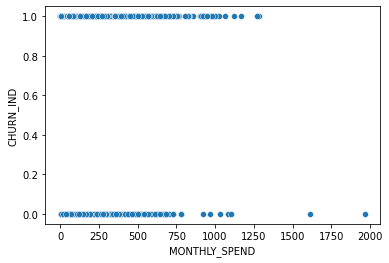

In [9]:
sns.scatterplot(x='MONTHLY_SPEND',y='CHURN_IND',data=churn)

# visualising data to see if a feature could make an effective predicter of churn

<AxesSubplot:xlabel='MONTHLY_SPEND', ylabel='PLAN_ACCESS_FEE'>

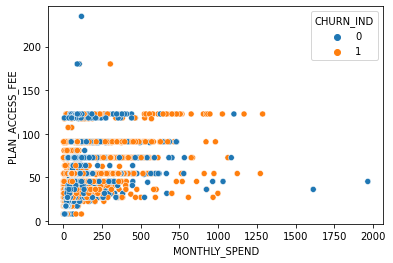

In [10]:
sns.scatterplot(x='MONTHLY_SPEND',y='PLAN_ACCESS_FEE',data=churn,hue='CHURN_IND')

# as we can see from the plots, just one or two features doesn't really help us that much. 

In [11]:
churn1 = churn
churn1

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46202,10,1,61.0,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC
46203,2,1,53.0,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW
46204,47,1,22.0,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW


In [12]:
churn

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46202,10,1,61.0,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC
46203,2,1,53.0,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW
46204,47,1,22.0,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW


In [13]:
churn['CFU'].unique()

array(['CONSUMER', 'SMALL BUSINESS'], dtype=object)

In [14]:
churn['CFU'] = churn['CFU'].astype('category')
churn['CFU_cat'] = churn['CFU'].cat.codes
churn.head()

# encoding categorical variables to numerical indicators

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CFU_cat
INDEX,,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,0
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,0
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,0
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,0
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,0


In [15]:
churn = pd.get_dummies(churn,columns=['CFU'])
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CFU_cat,CFU_CONSUMER,CFU_SMALL BUSINESS
INDEX,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,0,1,0
2,60,3,55.0,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,0,1,0
3,65,1,29.0,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,0,1,0
4,31,1,51.0,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,0,1,0
5,95,1,31.0,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,0,1,0


In [16]:
churn['BYO_PLAN_STATUS'].unique()

array(['NON BYO', 'BYO'], dtype=object)

In [17]:
churn['BYO_PLAN_STATUS'] = churn['BYO_PLAN_STATUS'].astype('category')
churn['BYO_PLAN_STATUS_cat'] = churn['BYO_PLAN_STATUS'].cat.codes
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CFU_cat,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO_PLAN_STATUS_cat
INDEX,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,0,1,0,1
2,60,3,55.0,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,0,1,0,1
3,65,1,29.0,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,0,1,0,0
4,31,1,51.0,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,0,1,0,1
5,95,1,31.0,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,0,1,0,1


In [18]:
churn = pd.get_dummies(churn,columns=['BYO_PLAN_STATUS'])
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,...,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CFU_cat,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO_PLAN_STATUS_cat,BYO_PLAN_STATUS_BYO,BYO_PLAN_STATUS_NON BYO
INDEX,,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,0,24,OFF-CONTRACT,24,...,1,61.40,COUNTRY,WA,0,1,0,1,0,1
2,60,3,55.0,59,54.54,5,0,24,OFF-CONTRACT,24,...,1,54.54,METRO,NSW,0,1,0,1,0,1
3,65,1,29.0,65,40.90,15,0,12,OFF-CONTRACT,12,...,1,2.50,COUNTRY,WA,0,1,0,0,1,0
4,31,1,51.0,31,31.81,31,0,24,OFF-CONTRACT,24,...,1,6.48,COUNTRY,VIC,0,1,0,1,0,1
5,95,1,31.0,95,54.54,0,0,24,OFF-CONTRACT,24,...,1,100.22,METRO,NSW,0,1,0,1,0,1


In [19]:
churn['CONTRACT_STATUS'].unique()

array(['OFF-CONTRACT', 'ON-CONTRACT', 'NO-CONTRACT'], dtype=object)

In [20]:
churn['CONTRACT_STATUS'] = churn['CONTRACT_STATUS'].astype('category')
churn['CONTRACT_STATUS_cat'] = churn['CONTRACT_STATUS'].cat.codes
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,...,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CFU_cat,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO_PLAN_STATUS_cat,BYO_PLAN_STATUS_BYO,BYO_PLAN_STATUS_NON BYO,CONTRACT_STATUS_cat
INDEX,,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,0,24,OFF-CONTRACT,24,...,61.40,COUNTRY,WA,0,1,0,1,0,1,1
2,60,3,55.0,59,54.54,5,0,24,OFF-CONTRACT,24,...,54.54,METRO,NSW,0,1,0,1,0,1,1
3,65,1,29.0,65,40.90,15,0,12,OFF-CONTRACT,12,...,2.50,COUNTRY,WA,0,1,0,0,1,0,1
4,31,1,51.0,31,31.81,31,0,24,OFF-CONTRACT,24,...,6.48,COUNTRY,VIC,0,1,0,1,0,1,1
5,95,1,31.0,95,54.54,0,0,24,OFF-CONTRACT,24,...,100.22,METRO,NSW,0,1,0,1,0,1,1


In [21]:
churn = pd.get_dummies(churn,columns=['CONTRACT_STATUS'])
churn

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,...,CFU_cat,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO_PLAN_STATUS_cat,BYO_PLAN_STATUS_BYO,BYO_PLAN_STATUS_NON BYO,CONTRACT_STATUS_cat,CONTRACT_STATUS_NO-CONTRACT,CONTRACT_STATUS_OFF-CONTRACT,CONTRACT_STATUS_ON-CONTRACT
INDEX,,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,0,24,24,SAMSUNG,...,0,1,0,1,0,1,1,0,1,0
2,60,3,55.0,59,54.54,5,0,24,24,APPLE,...,0,1,0,1,0,1,1,0,1,0
3,65,1,29.0,65,40.90,15,0,12,12,APPLE,...,0,1,0,0,1,0,1,0,1,0
4,31,1,51.0,31,31.81,31,0,24,24,APPLE,...,0,1,0,1,0,1,1,0,1,0
5,95,1,31.0,95,54.54,0,0,24,24,APPLE,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46202,10,1,61.0,9,27.27,7,0,0,0,OTHER,...,0,1,0,0,1,0,0,1,0,0
46203,2,1,53.0,2,54.54,2,0,24,24,UNKNOWN,...,0,1,0,1,0,1,1,0,1,0
46204,47,1,22.0,47,72.72,7,17,24,24,APPLE,...,0,1,0,1,0,1,2,0,0,1


In [22]:
churn['HANDSET_USED_BRAND'].unique()

# probably won't be relevant to the analysis so I won't encode it

array(['SAMSUNG', 'APPLE', 'UNKNOWN', 'OTHER', 'GOOGLE', 'HUAWEI'],
      dtype=object)

In [23]:
churn['COUNTRY_METRO_REGION'].unique()

# neither is this

array(['COUNTRY', 'METRO'], dtype=object)

In [24]:
churn1

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CFU_cat
INDEX,,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,0
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,0
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,0
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,0
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46202,10,1,61.0,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC,0
46203,2,1,53.0,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW,0
46204,47,1,22.0,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW,0


In [25]:
churn1['CFU'] = churn1['CFU'].astype('category')
churn1['CFU_cat'] = churn1['CFU'].cat.codes
churn1['BYO_PLAN_STATUS'] = churn1['BYO_PLAN_STATUS'].astype('category')
churn1['BYO_PLAN_STATUS_cat'] = churn1['BYO_PLAN_STATUS'].cat.codes
churn1['CONTRACT_STATUS'] = churn1['CONTRACT_STATUS'].astype('category')
churn1['CONTRACT_STATUS_cat'] = churn1['CONTRACT_STATUS'].cat.codes


<AxesSubplot:xlabel='CFU_cat', ylabel='count'>

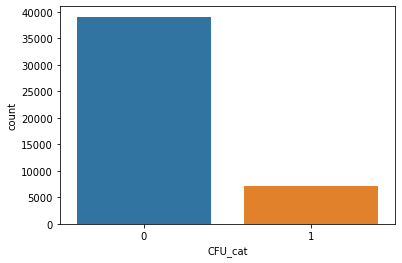

In [26]:
sns.countplot(x='CFU_cat', data=churn1)

In [27]:
churn1

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CFU_cat,BYO_PLAN_STATUS_cat,CONTRACT_STATUS_cat
INDEX,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,0,1,1
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,0,1,1
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,0,0,1
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,0,1,1
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46202,10,1,61.0,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC,0,0,0
46203,2,1,53.0,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW,0,1,1
46204,47,1,22.0,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW,0,1,2


In [28]:
churn1.columns

Index(['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'CFU', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'BYO_PLAN_STATUS', 'PLAN_TENURE',
       'MONTHS_OF_CONTRACT_REMAINING', 'LAST_FX_CONTRACT_DURATION',
       'CONTRACT_STATUS', 'PREV_CONTRACT_DURATION', 'HANDSET_USED_BRAND',
       'CHURN_IND', 'MONTHLY_SPEND', 'COUNTRY_METRO_REGION', 'STATE',
       'CFU_cat', 'BYO_PLAN_STATUS_cat', 'CONTRACT_STATUS_cat'],
      dtype='object')

In [29]:
churn1clean = churn1.drop(['CONTRACT_STATUS','HANDSET_USED_BRAND','COUNTRY_METRO_REGION','CFU','STATE','BYO_PLAN_STATUS'], axis=1)
churn1clean

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CONTRACT_STATUS_cat
INDEX,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,0,24,24,1,61.40,0,1,1
2,60,3,55.0,59,54.54,5,0,24,24,1,54.54,0,1,1
3,65,1,29.0,65,40.90,15,0,12,12,1,2.50,0,0,1
4,31,1,51.0,31,31.81,31,0,24,24,1,6.48,0,1,1
5,95,1,31.0,95,54.54,0,0,24,24,1,100.22,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46202,10,1,61.0,9,27.27,7,0,0,0,0,27.27,0,0,0
46203,2,1,53.0,2,54.54,2,0,24,24,1,54.99,0,1,1
46204,47,1,22.0,47,72.72,7,17,24,24,0,72.72,0,1,2


In [30]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [31]:
churn2 = churn1clean[['ACCT_CNT_SERVICES', 'AGE', 'PLAN_ACCESS_FEE', 'MONTHLY_SPEND', 'CHURN_IND']]
churn2

,ACCT_CNT_SERVICES,AGE,PLAN_ACCESS_FEE,MONTHLY_SPEND,CHURN_IND
INDEX,,,,,
1,1,30.0,54.54,61.40,1
2,3,55.0,54.54,54.54,1
3,1,29.0,40.90,2.50,1
4,1,51.0,31.81,6.48,1
5,1,31.0,54.54,100.22,1
...,...,...,...,...,...
46202,1,61.0,27.27,27.27,0
46203,1,53.0,54.54,54.99,1
46204,1,22.0,72.72,72.72,0


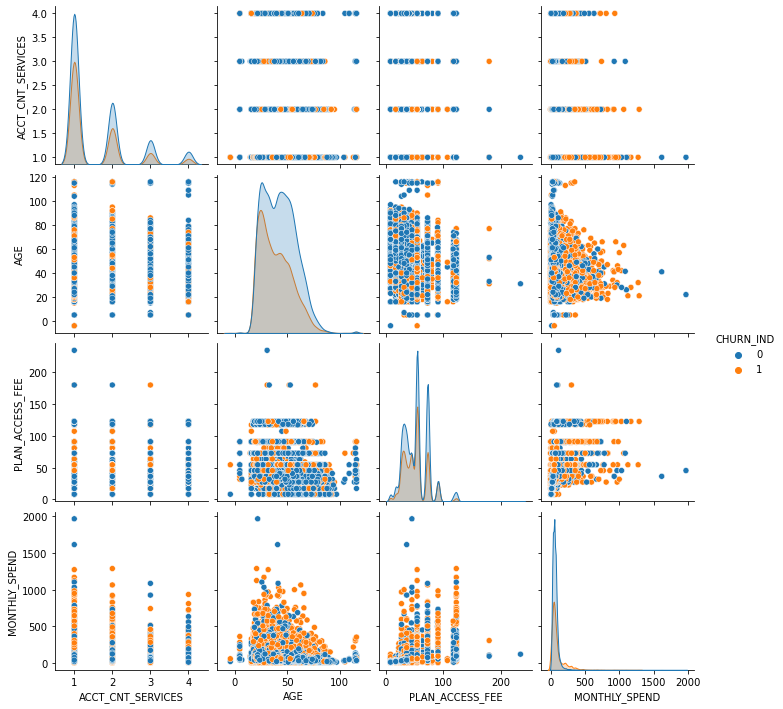

In [32]:
sns.pairplot(churn2, hue='CHURN_IND')

<AxesSubplot:xlabel='AGE', ylabel='CHURN_IND'>

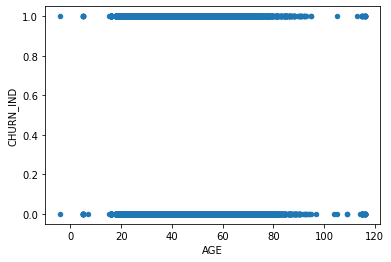

In [33]:
churn2.plot.scatter(x='AGE', y='CHURN_IND')

In [34]:
churn1clean.describe()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CONTRACT_STATUS_cat
count,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000,46205.000000
mean,45.873585,1.555719,41.411607,50.315507,51.364396,10.846878,8.236836,20.349746,15.249778,0.385023,75.188082,0.154074,0.767752,1.493778
std,33.077527,0.835534,15.251253,51.921797,20.855408,9.769925,8.341355,8.034700,10.983001,0.486606,73.519836,0.361024,0.422271,0.697514
min,0.000000,1.000000,-4.000000,0.000000,8.180000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,28.000000,11.000000,36.360000,3.000000,0.000000,24.000000,0.000000,0.000000,36.360000,0.000000,1.000000,1.000000
50%,44.000000,1.000000,40.000000,35.000000,54.540000,8.000000,7.000000,24.000000,24.000000,0.000000,54.540000,0.000000,1.000000,2.000000
75%,77.000000,2.000000,52.000000,69.000000,72.720000,16.000000,16.000000,24.000000,24.000000,1.000000,84.530000,0.000000,1.000000,2.000000
max,120.000000,4.000000,116.000000,259.000000,234.540000,147.000000,24.000000,36.000000,36.000000,1.000000,1965.890000,1.000000,1.000000,2.000000


In [35]:
# need to clean age data as I think that in Australia, the minimum age needed to set up a phone plan is 18 - kids' phones need to be set up under their parent's name. And I don't think that people older than 80 years old would have mobile phones - they'd still be sticking to their landlines!

churn2clean = churn1clean.drop(churn1clean.index[(churn1clean['AGE'] < 18) | (churn1clean['AGE'] > 80)])
churn2clean['AGE'].describe()

count    45665.000000
mean        41.168144
std         14.612100
min         18.000000
25%         28.000000
50%         40.000000
75%         52.000000
max         80.000000
Name: AGE, dtype: float64

<AxesSubplot:xlabel='AGE', ylabel='CHURN_IND'>

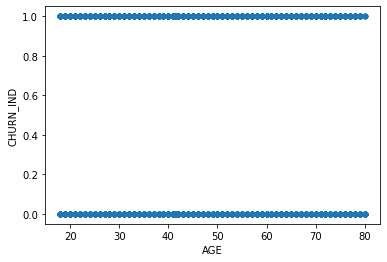

In [36]:
churn2clean.plot.scatter(x='AGE', y='CHURN_IND')

In [37]:
churn2clean0 = churn2clean[churn2clean['CHURN_IND'] == 0]
churn2clean0

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CONTRACT_STATUS_cat
INDEX,,,,,,,,,,,,,,
8153,15,1,66.0,15,31.81,15,9,24,0,0,74.17,0,1,2
8155,49,2,55.0,49,45.44,29,0,24,24,0,89.60,0,1,1
8159,71,2,34.0,51,72.72,29,0,24,24,0,161.12,0,1,1
8169,9,1,27.0,9,72.72,9,15,24,24,0,63.62,1,1,2
8172,46,1,34.0,46,72.72,7,17,24,24,0,84.53,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46201,46,4,51.0,46,8.18,5,0,12,12,0,8.18,0,1,1
46202,10,1,61.0,9,27.27,7,0,0,0,0,27.27,0,0,0
46204,47,1,22.0,47,72.72,7,17,24,24,0,72.72,0,1,2


In [38]:
churn2clean1 = churn2clean[churn2clean['CHURN_IND'] == 1]
churn2clean1

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CONTRACT_STATUS_cat
INDEX,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,0,24,24,1,61.40,0,1,1
2,60,3,55.0,59,54.54,5,0,24,24,1,54.54,0,1,1
3,65,1,29.0,65,40.90,15,0,12,12,1,2.50,0,0,1
4,31,1,51.0,31,31.81,31,0,24,24,1,6.48,0,1,1
5,95,1,31.0,95,54.54,0,0,24,24,1,100.22,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46191,93,2,44.0,142,54.54,6,0,24,24,1,72.72,0,1,1
46192,28,1,51.0,28,45.44,22,2,24,0,1,58.16,0,1,2
46194,29,1,21.0,29,63.63,2,0,24,24,1,80.44,0,0,1


Text(0.5, 1.0, 'Histogram of age distribution')

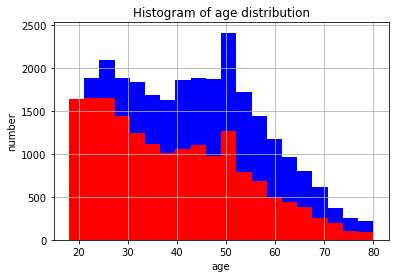

In [39]:
churn2clean0['AGE'].hist(histtype = 'stepfilled', bins = 20, color = 'blue')
churn2clean1['AGE'].hist(histtype = 'stepfilled', bins = 20, color = 'red')
plt.xlabel('age')
plt.ylabel('number')
plt.title('Histogram of age distribution')

# blue indicates didn't churn - stayed with the mobile service, red indicates churned - left the mobile service. As we can see, age really isn't that significant to the churn indicator. Younger people are more likely to use mobile phones, while usage rapidly drops off as people approach senior age due to general unfamiliarity with new technology. 

<ipython-input-40-d593f129cf8e>:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  countx, divisionx = np.histogram(churn2clean0['AGE'], normed = True)
<ipython-input-40-d593f129cf8e>:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  county, divisiony = np.histogram(churn2clean1['AGE'], normed = True)


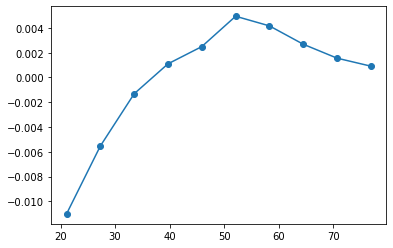

In [40]:
countx, divisionx = np.histogram(churn2clean0['AGE'], normed = True)
county, divisiony = np.histogram(churn2clean1['AGE'], normed = True)

val = [(divisionx[i] + divisionx[i+1])/2 for i in range (len(divisionx)-1)]
plt.plot(val, countx-county, 'o-')



In [41]:
churn2clean.corr()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CONTRACT_STATUS_cat
ACCOUNT_TENURE,1.000000,0.195156,0.262572,0.793224,-0.078999,0.251002,-0.166715,0.184417,0.509367,-0.151907,-0.134932,0.209590,0.124346,0.053230
ACCT_CNT_SERVICES,0.195156,1.000000,0.175470,0.066411,-0.005604,-0.043500,0.024187,-0.001034,0.019192,-0.063095,-0.019708,0.216301,0.014983,0.033247
AGE,0.262572,0.175470,1.000000,0.264328,-0.345358,0.063049,-0.184340,-0.135419,0.017180,-0.122082,-0.210088,0.127802,-0.109777,-0.180359
SERVICE_TENURE,0.793224,0.066411,0.264328,1.000000,-0.069650,0.222621,-0.138865,0.150610,0.419408,-0.154008,-0.111671,0.165656,0.124795,0.037322
PLAN_ACCESS_FEE,-0.078999,-0.005604,-0.345358,-0.069650,1.000000,-0.063844,0.468791,0.388459,0.131723,-0.038352,0.445154,0.061916,0.403307,0.476040
PLAN_TENURE,0.251002,-0.043500,0.063049,0.222621,-0.063844,1.000000,-0.434561,0.125846,0.185016,0.142791,-0.060455,0.072229,0.133005,-0.092316
MONTHS_OF_CONTRACT_REMAINING,-0.166715,0.024187,-0.184340,-0.138865,0.468791,-0.434561,1.000000,0.422597,-0.012200,-0.248796,0.299622,-0.032427,0.508137,0.716191
LAST_FX_CONTRACT_DURATION,0.184417,-0.001034,-0.135419,0.150610,0.388459,0.125846,0.422597,1.000000,0.517320,-0.067823,0.214821,0.062512,0.666024,0.796696
PREV_CONTRACT_DURATION,0.509367,0.019192,0.017180,0.419408,0.131723,0.185016,-0.012200,0.517320,1.000000,-0.064823,-0.012988,0.143573,0.229734,0.251276
CHURN_IND,-0.151907,-0.063095,-0.122082,-0.154008,-0.038352,0.142791,-0.248796,-0.067823,-0.064823,1.000000,0.187810,-0.044982,-0.073923,-0.196415


<AxesSubplot:xlabel='MONTHLY_SPEND', ylabel='CHURN_IND'>

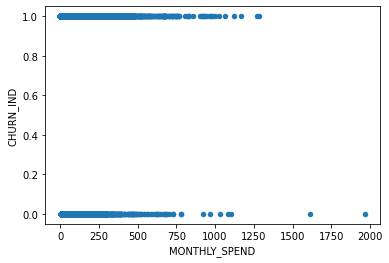

In [42]:
churn2clean.plot.scatter(x='MONTHLY_SPEND', y='CHURN_IND')

As we can see from the correlation, there does not seem to be any strong correlation between any one variable and the churn indicator. Thus, we will look at multiple logistic regression to see the results of including multiple variables. 

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHURN_IND', ylabel='count'>

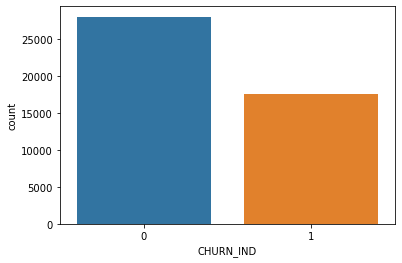

In [43]:
sns.countplot(churn2clean['CHURN_IND'], label="Count")

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(churn2clean.drop(['CHURN_IND'], axis=1), churn2clean['CHURN_IND'], stratify=churn2clean['CHURN_IND'], random_state=99)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (34248, 13)
y_train shape:  (34248,)
X_test shape:  (11417, 13)
y_test shape:  (11417,)


In [45]:
from sklearn.linear_model import LogisticRegression

# training model
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# Evaluating trained model on training and test set
from sklearn.metrics import accuracy_score

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Accuracy on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Accuracy on test set: ", accuracy_score(y_test, y_pred_test))

Accuracy on training set:  0.725385423966363
Accuracy on test set:  0.7253218884120172


In [47]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 3)

# selecting the 3 best features 

rfe_model = rfe.fit(X_train, y_train)
print("Number of features: ", rfe_model.n_features_)
print("Selected features: ", rfe_model.support_)
print("Feature ranking: ", rfe_model.ranking_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

Number of features:  3
Selected features:  [False False False False False False False False False False  True  True
  True]
Feature ranking:  [11  9  5  7 10  8  2  3  4  6  1  1  1]


In [48]:
churn2clean.head()

# As we can see, the last three columns - CFU, BYO plan status and Contract status are the best predictors of churn. 

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CONTRACT_STATUS_cat
INDEX,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,0,24,24,1,61.40,0,1,1
2,60,3,55.0,59,54.54,5,0,24,24,1,54.54,0,1,1
3,65,1,29.0,65,40.90,15,0,12,12,1,2.50,0,0,1
4,31,1,51.0,31,31.81,31,0,24,24,1,6.48,0,1,1
5,95,1,31.0,95,54.54,0,0,24,24,1,100.22,0,1,1


In [49]:
churn2clean.columns

Index(['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'PLAN_TENURE', 'MONTHS_OF_CONTRACT_REMAINING',
       'LAST_FX_CONTRACT_DURATION', 'PREV_CONTRACT_DURATION', 'CHURN_IND',
       'MONTHLY_SPEND', 'CFU_cat', 'BYO_PLAN_STATUS_cat',
       'CONTRACT_STATUS_cat'],
      dtype='object')

In [50]:
churn3clean = churn2clean[['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'SERVICE_TENURE', 'PLAN_ACCESS_FEE', 'PLAN_TENURE', 'MONTHLY_SPEND', 'CFU_cat', 'BYO_PLAN_STATUS_cat', 'CHURN_IND']]
churn3clean

# further cleaning out irrelevant columns

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CHURN_IND
INDEX,,,,,,,,,,
1,46,1,30.0,46,54.54,15,61.40,0,1,1
2,60,3,55.0,59,54.54,5,54.54,0,1,1
3,65,1,29.0,65,40.90,15,2.50,0,0,1
4,31,1,51.0,31,31.81,31,6.48,0,1,1
5,95,1,31.0,95,54.54,0,100.22,0,1,1
...,...,...,...,...,...,...,...,...,...,...
46202,10,1,61.0,9,27.27,7,27.27,0,0,0
46203,2,1,53.0,2,54.54,2,54.99,0,1,1
46204,47,1,22.0,47,72.72,7,72.72,0,1,0


In [51]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(churn3clean.drop(['CHURN_IND'], axis=1), churn3clean['CHURN_IND'], stratify=churn3clean['CHURN_IND'], random_state=99)

# checking shapes of each
print("X_train1 shape: ", X_train1.shape)
print("y_train1 shape: ", y_train1.shape)
print("X_test1 shape: ", X_test1.shape)
print("y_test1 shape: ", y_test1.shape)

X_train1 shape:  (34248, 9)
y_train1 shape:  (34248,)
X_test1 shape:  (11417, 9)
y_test1 shape:  (11417,)


In [52]:
# training model
lr1 = LogisticRegression().fit(X_train1, y_train1)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Evaluating trained model on training and test set

# making predictions on training and test set
y_pred_train1 = lr1.predict(X_train1)
y_pred_test1 = lr1.predict(X_test1)

# calculating accuracy score on training set
print("Accuracy on training set: ", accuracy_score(y_train1, y_pred_train1))

# calculating accuracy score on test set
print("Accuracy on test set: ", accuracy_score(y_test1, y_pred_test1))

Accuracy on training set:  0.6875729969633263
Accuracy on test set:  0.6800385390207585


In [54]:
rfe1 = RFE(lr1, 8)
rfe_model1 = rfe.fit(X_train1, y_train1)
print("No. of features: ", rfe_model1.n_features_)
print("Selected features: ", rfe_model1.support_)
print("Features ranking: ", rfe_model1.ranking_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

No. of features:  3
Selected features:  [False  True False False False False False  True  True]
Features ranking:  [7 1 3 6 4 2 5 1 1]


In [55]:
churn3clean.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CHURN_IND
INDEX,,,,,,,,,,
1,46,1,30.0,46,54.54,15,61.40,0,1,1
2,60,3,55.0,59,54.54,5,54.54,0,1,1
3,65,1,29.0,65,40.90,15,2.50,0,0,1
4,31,1,51.0,31,31.81,31,6.48,0,1,1
5,95,1,31.0,95,54.54,0,100.22,0,1,1


This time, the three most efficient features are account connected services ACCT_CNT_SERVICES, CFU category, and BYO plan status category.

Comparing this with previously, the CFU and  BYO plan status are the three most efficient features in both instances. This time, we also have account connected services, whereas last time had Contract status.


In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer

km = KMeans(n_clusters = 5, random_state = 628)
km.fit(churn3clean)

# KMeans clustering with 5 clusters 

KMeans(n_clusters=5, random_state=628)

In [57]:
churn3clean['cluster'] = km.predict(churn3clean)
churn3clean.head()

<ipython-input-57-52dacce3cf01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn3clean['cluster'] = km.predict(churn3clean)


,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CHURN_IND,cluster
INDEX,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,61.40,0,1,1,0
2,60,3,55.0,59,54.54,5,54.54,0,1,1,0
3,65,1,29.0,65,40.90,15,2.50,0,0,1,0
4,31,1,51.0,31,31.81,31,6.48,0,1,1,3
5,95,1,31.0,95,54.54,0,100.22,0,1,1,0


In [58]:
km.inertia_/len(churn3clean)

2797.4638116966357

In [59]:
churn3clean.groupby('cluster').mean()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHLY_SPEND,CFU_cat,BYO_PLAN_STATUS_cat,CHURN_IND
cluster,,,,,,,,,,
0,69.016441,1.655164,42.606437,60.355375,50.786990,12.894188,58.797201,0.203914,0.809636,0.318820
1,29.201581,1.529644,35.026506,29.148221,79.238241,8.438735,503.892885,0.166008,0.944664,0.841897
2,29.800811,1.496526,35.013693,28.294441,63.951844,8.967574,227.100498,0.115518,0.952519,0.770411
3,16.833772,1.446414,38.654007,13.966977,50.695509,8.790113,57.970241,0.082759,0.681270,0.402553
4,90.842793,1.671210,50.526139,163.874347,46.479429,13.508402,53.903200,0.255975,0.823376,0.237491


<AxesSubplot:ylabel='cluster'>

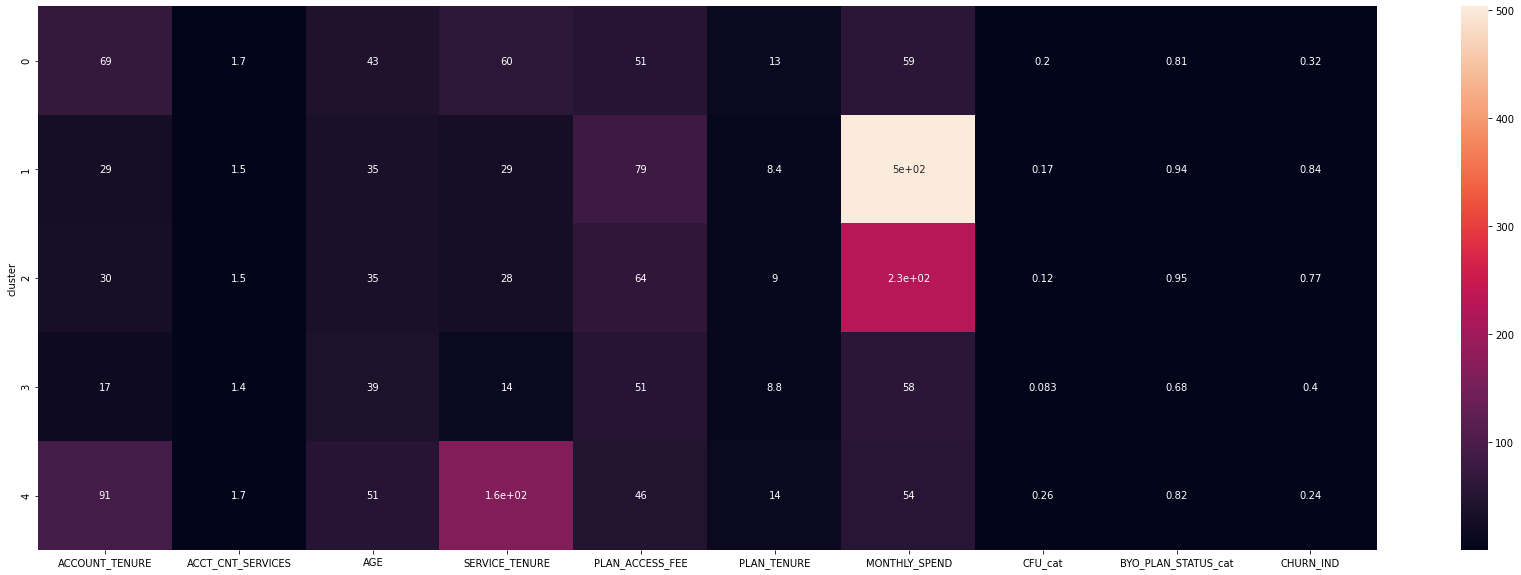

In [60]:
plt.figure(figsize=(30,10))
sns.heatmap(churn3clean.groupby('cluster').mean(), annot=True)

In [61]:
churn3clean['cluster'].value_counts()

3    19744
0    16605
4     5356
2     3454
1      506
Name: cluster, dtype: int64